### Import required libraries

In [72]:
import pandas as pd
import os
import psycopg2

### Define a function to test database connectivity against a PostgreSQL database in AWS.

In [73]:
def connect():
    """ Test Connection to the PostgreSQL database server """
    conn = None
    try:
        conn = psycopg2.connect(
            host="database-1.cqfnswik0i0s.us-east-2.rds.amazonaws.com",
            database="DarwinTwo",
            user="gcpostgres",
            password="yb9GPoXzcdaLPFQO2ULv")

        # create a cursor
        cur = conn.cursor()

        # execute a statement
        print('PostgreSQL database version:')
        cur.execute('SELECT version()')

        # display the PostgreSQL database server version
        db_version = cur.fetchone()
        print(db_version)
        # close the communication with the PostgreSQL
        cur.close()
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
            print('Database connection closed.')
connect()

PostgreSQL database version:
('PostgreSQL 15.3 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-12), 64-bit',)
Database connection closed.


### Define a function to pull our data from PostgreSQL
**Future optimizations***

- If we want to filter on a particular update_origin, we can incorporate that in the select statement against the database.

In [74]:
def read_PGSQL():
    """ Get data from our PostgreSQL database server """
    conn = None
    try:
        conn = psycopg2.connect(
            host="database-1.cqfnswik0i0s.us-east-2.rds.amazonaws.com",
            database="DarwinTwo",
            user="gcpostgres",
            password="yb9GPoXzcdaLPFQO2ULv")

        #  query the database directly using pandas...
        df = pd.read_sql("SELECT * from darwin;", conn)

        # close the communication with the PostgreSQL
        conn.close()
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
            print('Database connection closed.')

    return df

In [75]:
### 

In [76]:
# def read_parquet():
#     # Get the current working directory
#     current_dir = os.getcwd()
#     # Construct the local file path
#     csv_file_path = os.path.join(current_dir, 'Raildata-psqlcsv.csv')
#     print (csv_file_path)
#     # Read the CSV file into a DataFrame
#     df = pd.read_csv(csv_file_path)

#     # Display the DataFrame
#     return df

In [77]:
##########################################################################################
#  If reading from parquet get the datatframe kikle this
# df = read_parquet()

##########################################################################################
#  If reading from the the database do this...
df = read_PGSQL()

##########################################################################################
#  Show the result
df

/Users/diontajones/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Database connection closed.


,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,platform,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,source_instance,estimated_time_minutes
0,202308167142004,G42004,2023-08-16,TD,WELLING,None,21:20:30,21:21:00,21:21:00,21:21:00,...,1,NaN,None,None,None,None,False,False,None,None
1,202308168044880,P44880,2023-08-16,None,MANORS,None,21:20:30,21:21:00,21:21:00,21:21:00,...,None,2.0,None,None,None,None,False,False,None,None
2,202308167195839,G95839,2023-08-16,TD,SVNOAKS,None,21:31:00,21:32:00,21:31:00,21:32:00,...,3,4.0,None,None,None,None,False,False,None,None
3,202308167623593,L23593,2023-08-16,TD,CLPHMJM,None,21:20:00,21:21:00,21:20:00,21:21:00,...,11,NaN,None,None,None,None,False,False,None,None
4,202308168028082,P28082,2023-08-16,TD,SURREYQ,None,21:22:30,21:23:30,21:23:00,21:23:00,...,1,5.0,None,None,None,None,False,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30031,202308218726535,W26535,2023-08-21,TD,NWPTRTG,None,19:29:30,19:31:30,19:31:00,19:31:00,...,2,NaN,None,None,None,None,False,False,None,None
30032,202308218726535,W26535,2023-08-21,TD,CRDFCEN,None,19:44:00,19:47:00,19:45:00,19:47:00,...,3,NaN,None,None,None,None,False,False,None,None
30033,202308217635456,L35456,2023-08-21,TD,LVRPSPY,None,17:11:00,17:11:30,17:11:00,17:11:00,...,5,NaN,None,None,None,None,False,False,None,None
30034,202308218933367,Y33367,2023-08-21,Darwin,EDINPRK,None,17:11:00,17:11:30,17:11:00,17:11:00,...,1,NaN,None,None,None,None,False,False,None,None


In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import time, timedelta, datetime

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30036 entries, 0 to 30035
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   route_id                30036 non-null  object 
 1   unique_id               30036 non-null  object 
 2   service_start_date      30036 non-null  object 
 3   update_origin           29547 non-null  object 
 4   train_platform          30036 non-null  object 
 5   working_time_pass       0 non-null      object 
 6   working_time_arrival    30036 non-null  object 
 7   working_time_departure  30036 non-null  object 
 8   planned_time_arrival    26668 non-null  object 
 9   planned_time_departure  26401 non-null  object 
 10  actual_arrival_time     24209 non-null  object 
 11  actual_departure_time   27176 non-null  object 
 12  platform                28080 non-null  object 
 13  train_length            10599 non-null  float64
 14  estimated_time          0 non-null    

In [80]:
# Check the data type of the column
dtype = df['working_time_arrival'].dtype
print("Data type of 'working_time_arrival' column:", dtype)

Data type of 'working_time_arrival' column: object


## Dropping null columns

In [81]:
dropped = ['working_time_pass', 'estimated_time', 'source', 'actual_time', 
           'actual_time_class', 'source_instance', 'estimated_time_minutes']
df = df.drop(columns=dropped)

### Merging train station data

In [82]:
df2 = pd.read_csv('RailReferences.csv')
dropped = ['AtcoCode', 'StationNameLang',
           'GridType', 'Easting', 'Northing', 'CreationDateTime',
           'ModificationDateTime', 'RevisionNumber', 'Modification']
df2 = df2.drop(columns=dropped)
merged_df = pd.merge(df, df2, left_on='train_platform', right_on='TiplocCode', how='outer')
merged_df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,train_length,is_delayed_arrival,is_delayed_departure,TiplocCode,CrsCode,StationName
0,202308167142004,G42004,2023-08-16,TD,WELLING,21:20:30,21:21:00,21:21:00,21:21:00,None,21:21:00,1,NaN,False,False,WELLING,WLI,Welling Rail Station
1,202308167442616,J42616,2023-08-16,CIS,WELLING,00:29:30,00:30:00,00:30:00,00:30:00,00:31:00,00:31:00,2,10.0,False,False,WELLING,WLI,Welling Rail Station
2,202308167442616,J42616,2023-08-16,TD,WELLING,00:29:30,00:30:00,00:30:00,00:30:00,00:30:00,00:31:00,2,10.0,False,False,WELLING,WLI,Welling Rail Station
3,202308177442621,J42621,2023-08-17,CIS,WELLING,01:05:00,01:05:30,01:05:00,01:05:00,01:05:00,01:05:00,2,10.0,False,False,WELLING,WLI,Welling Rail Station
4,202308177196414,G96414,2023-08-17,TD,WELLING,00:40:30,00:41:00,00:41:00,00:41:00,00:41:00,00:43:00,2,8.0,False,False,WELLING,WLI,Welling Rail Station


In [83]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30492 entries, 0 to 30491
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   route_id                30036 non-null  object 
 1   unique_id               30036 non-null  object 
 2   service_start_date      30036 non-null  object 
 3   update_origin           29547 non-null  object 
 4   train_platform          30036 non-null  object 
 5   working_time_arrival    30036 non-null  object 
 6   working_time_departure  30036 non-null  object 
 7   planned_time_arrival    26668 non-null  object 
 8   planned_time_departure  26401 non-null  object 
 9   actual_arrival_time     24209 non-null  object 
 10  actual_departure_time   27176 non-null  object 
 11  platform                28080 non-null  object 
 12  train_length            10599 non-null  float64
 13  is_delayed_arrival      30036 non-null  object 
 14  is_delayed_departure    30036 non-null

#### Re-arrange columns in new database called Rail

In [84]:
rail = merged_df[['route_id', 'unique_id', 'service_start_date', 'update_origin',
                  'train_platform', 'TiplocCode', 'CrsCode',
                  'StationName', 'working_time_arrival', 'working_time_departure',
                  'planned_time_arrival', 'planned_time_departure', 'platform',
                  'train_length', 'actual_arrival_time', 'actual_departure_time',
                  'is_delayed_arrival', 'is_delayed_departure',]]

In [85]:
rail

,route_id,unique_id,service_start_date,update_origin,train_platform,TiplocCode,CrsCode,StationName,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,platform,train_length,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure
0,202308167142004,G42004,2023-08-16,TD,WELLING,WELLING,WLI,Welling Rail Station,21:20:30,21:21:00,21:21:00,21:21:00,1,NaN,None,21:21:00,False,False
1,202308167442616,J42616,2023-08-16,CIS,WELLING,WELLING,WLI,Welling Rail Station,00:29:30,00:30:00,00:30:00,00:30:00,2,10.0,00:31:00,00:31:00,False,False
2,202308167442616,J42616,2023-08-16,TD,WELLING,WELLING,WLI,Welling Rail Station,00:29:30,00:30:00,00:30:00,00:30:00,2,10.0,00:30:00,00:31:00,False,False
3,202308177442621,J42621,2023-08-17,CIS,WELLING,WELLING,WLI,Welling Rail Station,01:05:00,01:05:30,01:05:00,01:05:00,2,10.0,01:05:00,01:05:00,False,False
4,202308177196414,G96414,2023-08-17,TD,WELLING,WELLING,WLI,Welling Rail Station,00:40:30,00:41:00,00:41:00,00:41:00,2,8.0,00:41:00,00:43:00,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30487,NaN,NaN,NaN,NaN,NaN,BECCLES,BCC,Beccles Rail Station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30488,NaN,NaN,NaN,NaN,NaN,HADISCO,HAD,Haddiscoe Rail Station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30489,NaN,NaN,NaN,NaN,NaN,SMRLYTN,SYT,Somerleyton Rail Station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30490,NaN,NaN,NaN,NaN,NaN,YARMTH,GYM,Great Yarmouth Rail Station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Converting time columns to timedelta

## The dtype for the time is datetime.time but when there are also null values, it will show as an abject

In [86]:
# rail['arr_delay'] = rail['planned_time_arrival'] - rail['actual_arrival_time']

In [87]:
# rail['planned_time_arrival'].dtype

In [88]:
# dtype = df['planned_time_arrival'].dtype
# print("Data type of 'working_time_arrival' column:", dtype)

In [89]:
# rail['planned_time_arrival'] = pd.to_datetime(rail['planned_time_arrival'])

In [90]:
# # Delete extra null rows based on route_id
# rail = rail.dropna(subset=['route_id'])

In [91]:
# # Convert time columns to datetime objects
# time_columns = ['working_time_arrival', 'working_time_departure', 'actual_arrival_time', 'actual_departure_time', 'planned_time_departure', 'planned_time_arrival']
# rail[time_columns] = rail[time_columns].apply(pd.to_datetime)

In [92]:
# rail.info()

## Which update origin has the most values - the system pushed the most

In [93]:
source_count = rail['update_origin'].value_counts()
source_perc = (source_count / rail['update_origin'].count()) * 100
source_perc

TD             42.894372
Darwin         30.260263
CIS            17.588926
Trust           8.742004
Tyrell          0.416286
Workstation     0.098149
Name: update_origin, dtype: float64

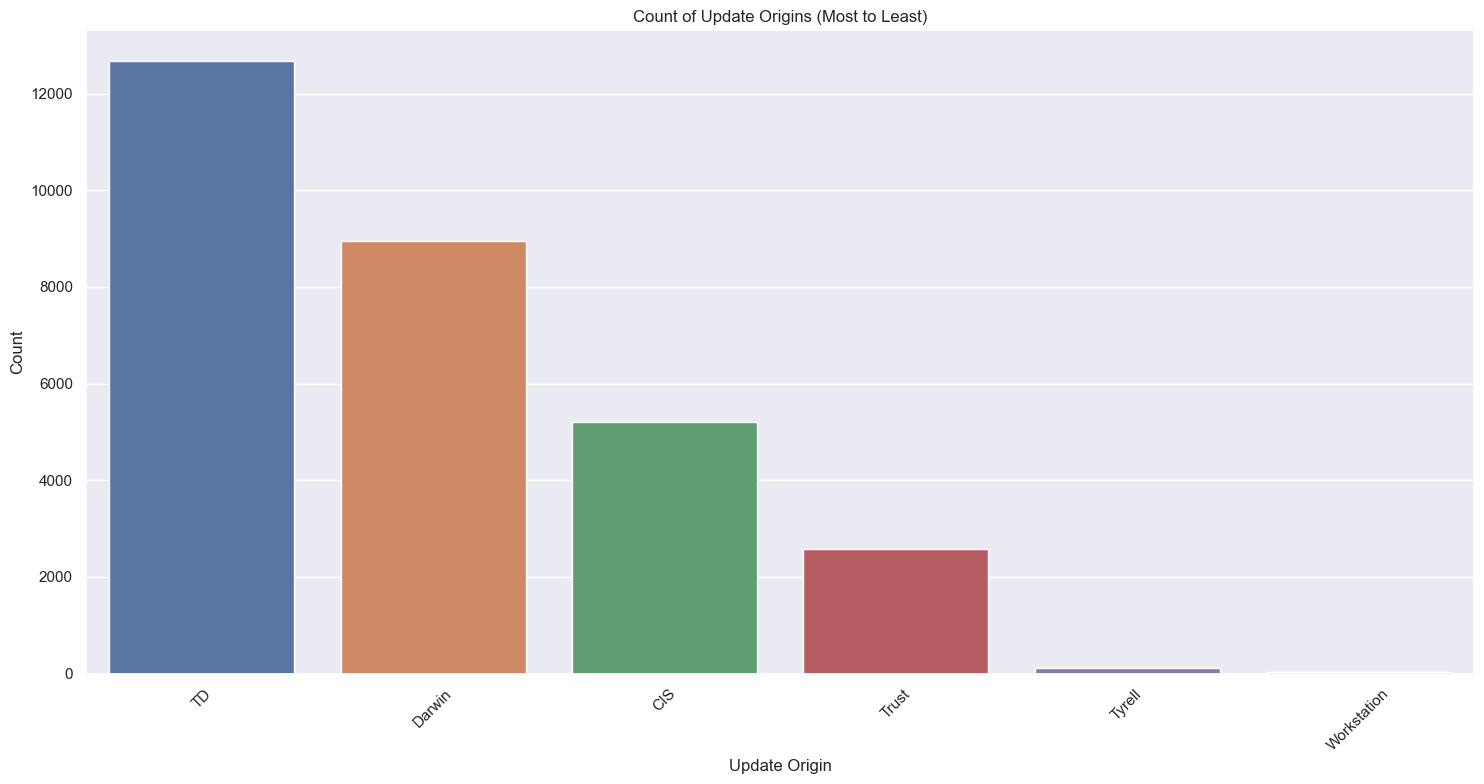

In [94]:
# Set the figure size
sns.set(rc={'figure.figsize': (15, 8)})

# Create a count plot using seaborn
order = rail['update_origin'].value_counts().index  # Sorting the categories by counts
sns.countplot(x='update_origin', data=rail, order=order)

plt.xlabel('Update Origin')
plt.ylabel('Count')
plt.title('Count of Update Origins (Most to Least)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Getting the value counts of update origins with null values in the time columns

In [95]:
# Selecting the relevant columns
time_columns = ['planned_time_arrival', 'planned_time_departure', 'actual_arrival_time', 'actual_departure_time']

# Group by update_origin and sum the null values for each time column
null_counts_by_origin = df.groupby('update_origin')[time_columns].apply(lambda x: x.isna().sum())

# Sum up the counts for each column
total_null_counts_by_origin = null_counts_by_origin.sum(axis=1)

# Sort the Series in descending order
sorted_null_counts_by_origin = total_null_counts_by_origin.sort_values(ascending=False)

print(total_null_counts_by_origin)

update_origin
CIS             993
Darwin         6096
TD             6995
Trust          1404
Tyrell           68
Workstation      13
dtype: int64


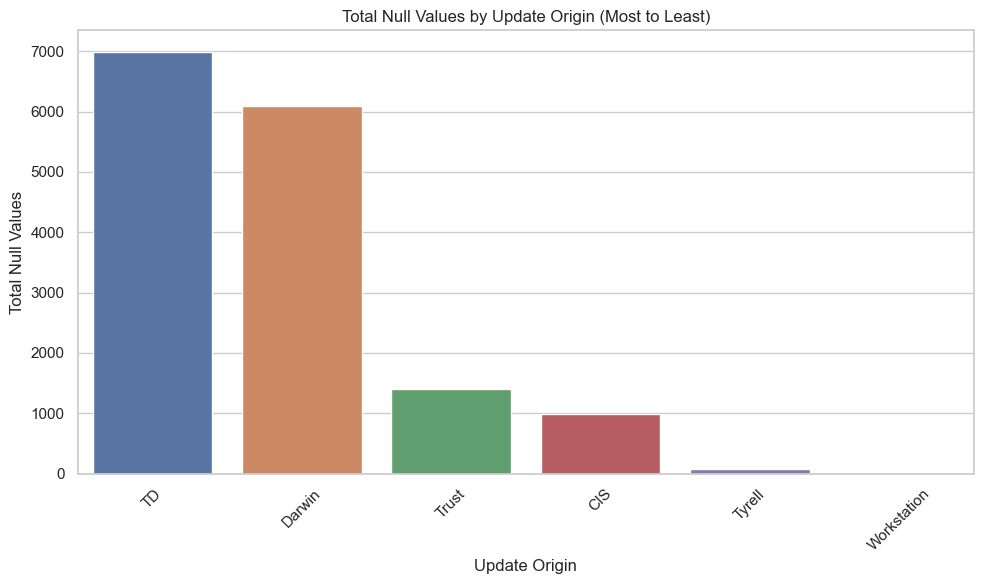

In [96]:
# Set style
sns.set(style="whitegrid")

# Create a bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_null_counts_by_origin.index, y=sorted_null_counts_by_origin)
plt.xlabel('Update Origin')
plt.ylabel('Total Null Values')
plt.title('Total Null Values by Update Origin (Most to Least)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [97]:
total_null_percentage_by_origin = (total_null_counts_by_origin / total_null_counts_by_origin.sum()) * 100
total_null_percentage_by_origin

update_origin
CIS             6.378059
Darwin         39.154731
TD             44.929026
Trust           9.017920
Tyrell          0.436765
Workstation     0.083499
dtype: float64

## Evaluating delays against null data

In [98]:
delayed_arrivals = rail['is_delayed_arrival'].value_counts()
delayed_departures = rail['is_delayed_departure'].value_counts()

In [99]:
null_counts_planned_arrival = rail['planned_time_arrival'].isnull().value_counts()
null_counts_planned_departure = rail['planned_time_departure'].isnull().value_counts()

In [100]:
print('null planned arrivals')
print(null_counts_planned_arrival)
print('')
print('delayed arrivals')
print(delayed_arrivals)

null planned arrivals
False    26668
True      3824
Name: planned_time_arrival, dtype: int64

delayed arrivals
False    25827
True      4209
Name: is_delayed_arrival, dtype: int64


In [101]:
print('null planned departures')
print(null_counts_planned_departure)
print('')
print('delayed departures')
print(delayed_departures)

null planned departures
False    26401
True      4091
Name: planned_time_departure, dtype: int64

delayed departures
False    25708
True      4328
Name: is_delayed_departure, dtype: int64


In [102]:
# Calculate the percentage of true delayed arrivals among true null planned arrivals
true_delayed_arrivals = delayed_arrivals[True]
true_null_planned_arrivals = null_counts_planned_arrival[True]

percentage_arr = (true_null_planned_arrivals / true_delayed_arrivals) * 100
print("Percentage of true delayed arrivals among true null planned arrivals:", percentage_arr, "%")

Percentage of true delayed arrivals among true null planned arrivals: 90.85293418864339 %


In [103]:
# Calculate the percentage of true delayed arrivals among true null planned arrivals
true_delayed_departures = delayed_departures[True]
true_null_planned_departures = null_counts_planned_departure[True]

percentage_dep = (true_null_planned_departures / true_delayed_departures) * 100
print("Percentage of true delayed arrivals among true null planned arrivals:", percentage_dep, "%")

Percentage of true delayed arrivals among true null planned arrivals: 94.52402957486137 %


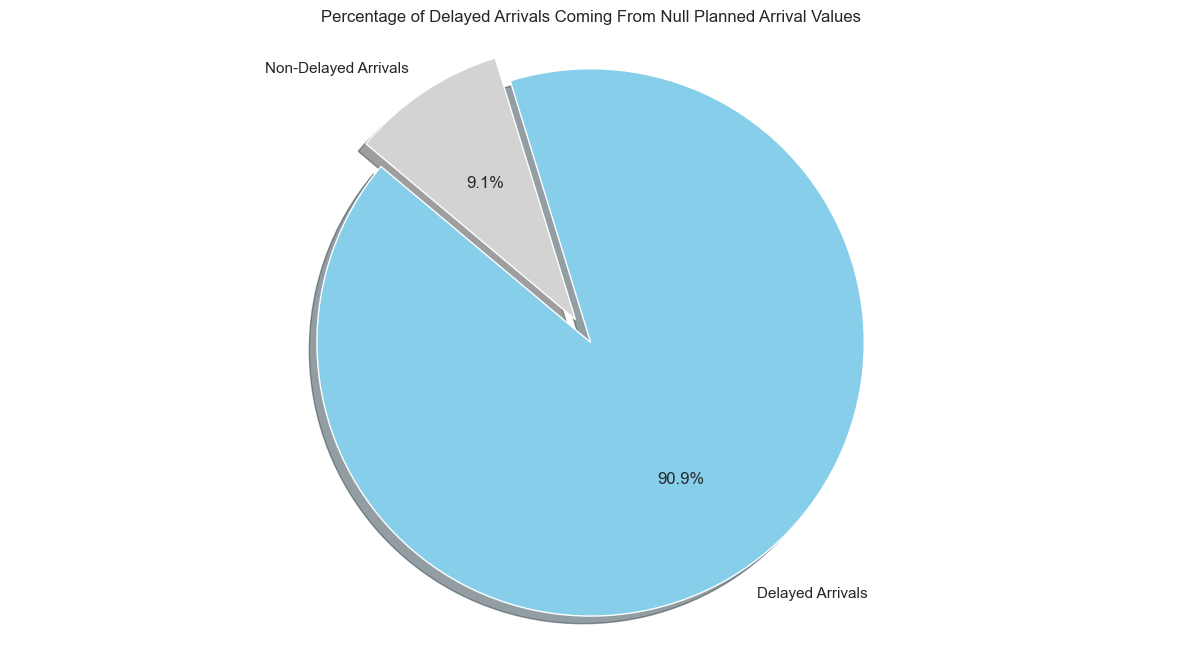

In [104]:
# Calculate the percentage of true delayed arrivals among true null planned arrivals
true_delayed_arrivals = delayed_arrivals[True]
true_null_planned_arrivals = null_counts_planned_arrival[True]
percentage_arr = (true_null_planned_arrivals / true_delayed_arrivals) * 100

# Create a pie chart
labels = ['Delayed Arrivals', 'Non-Delayed Arrivals']
sizes = [percentage_arr, 100 - percentage_arr]  # Complement to 100%
colors = ['skyblue', 'lightgray']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Percentage of Delayed Arrivals Coming From Null Planned Arrival Values")
plt.show()

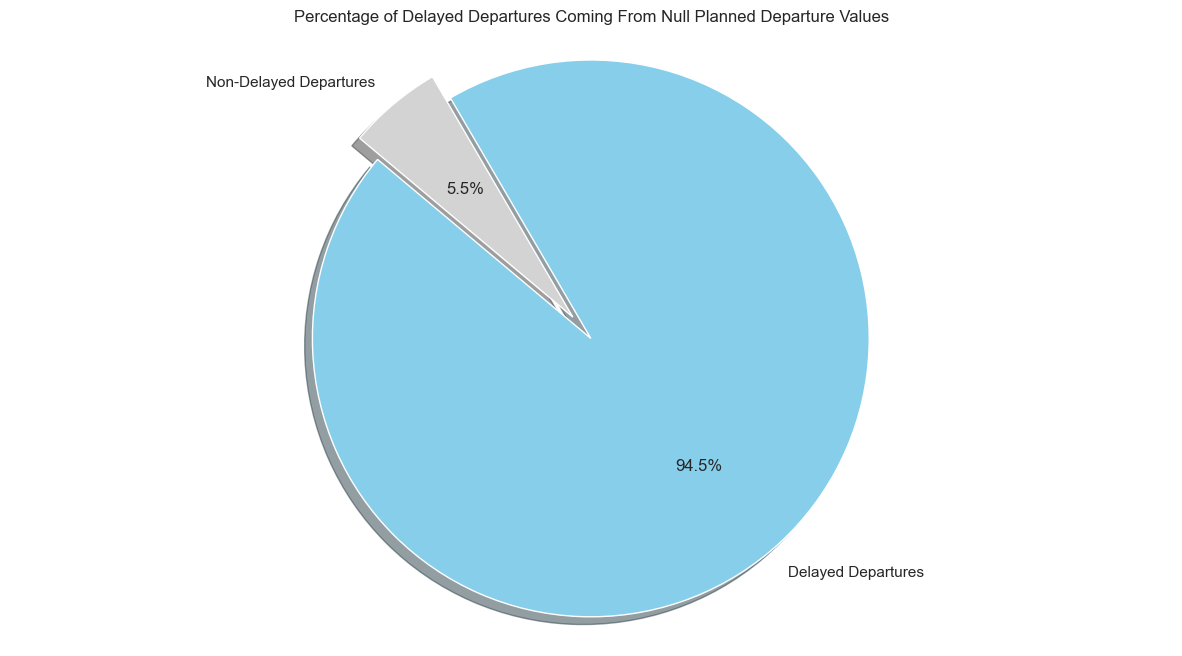

In [105]:
true_delayed_departures = delayed_departures[True]
true_null_planned_departures = null_counts_planned_departure[True]
percentage_dep = (true_null_planned_departures / true_delayed_departures) * 100

# Create a pie chart
labels = ['Delayed Departures', 'Non-Delayed Departures']
sizes = [percentage_dep, 100 - percentage_dep]  # Complement to 100%
colors = ['skyblue', 'lightgray']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Percentage of Delayed Departures Coming From Null Planned Departure Values")
plt.show()

### Evaluating on-time routes vs delayed

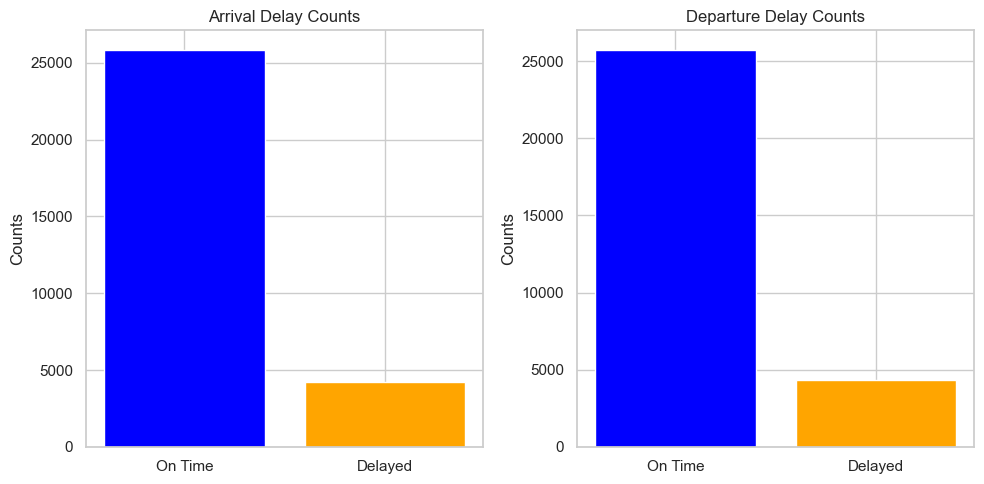

In [106]:
# Data
labels = ['On Time', 'Delayed']
counts_arrival = delayed_arrivals[0], delayed_arrivals[1]
counts_departure = delayed_departures[0], delayed_departures[1]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Bar chart for arrival delays
ax1.bar(labels, counts_arrival, color=['blue', 'orange'])
ax1.set_title('Arrival Delay Counts')
ax1.set_ylabel('Counts')

# Bar chart for departure delays
ax2.bar(labels, counts_departure, color=['blue', 'orange'])
ax2.set_title('Departure Delay Counts')
ax2.set_ylabel('Counts')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [107]:
platform_counts_per_id = rail.groupby('unique_id')['StationName'].value_counts()
platform_counts_per_id_df = platform_counts_per_id.reset_index(name='station_count')
train_platform_value_counts = platform_counts_per_id_df['StationName'].value_counts()
train_platform_value_counts_df = train_platform_value_counts.reset_index()
train_platform_value_counts_df.columns = ['station_name', 'count']
train_platform_value_counts_df

,station_name,count
0,Clapham Junction Rail Station,167
1,London Bridge Rail Station,122
2,East Croydon Rail Station,93
3,London St Pancras International LL Rail Station,81
4,Willesden Junction Low Level Rail Station,80
...,...,...
2158,Cattal Rail Station,1
2159,Rishton Rail Station,1
2160,Bamber Bridge Rail Station,1
2161,Lostock Hall Rail Station,1


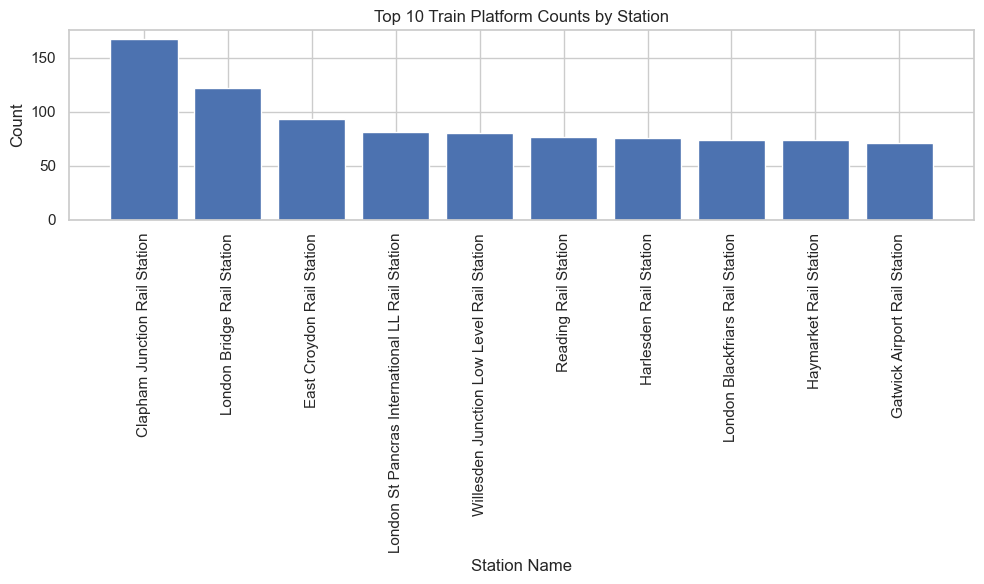

In [109]:
# Sort the DataFrame by the count in descending order
sorted_df = train_platform_value_counts_df.sort_values(by='count', ascending=False)

# Select the top 10 stations
top_10_stations = sorted_df.head(10)

# Plotting the bar chart for the top 10 stations
plt.figure(figsize=(10, 6))
plt.bar(top_10_stations['station_name'], top_10_stations['count'])
plt.xlabel('Station Name')
plt.ylabel('Count')
plt.title('Top 10 Train Platform Counts by Station')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()